In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append('../src/DataShap/')

In [2]:
import time
import numpy as np
from DShap import DShap
import matplotlib.pyplot as plt
import sklearn
from sk_utils import *
%matplotlib inline
MEM_DIR = './'

Let's have a calssification problem and use the a losigitic regression model for a small data set of size 100.

In [3]:
problem, model = 'classification', 'logistic'
# Empty list in the case of logistic regression
hidden_units = []
train_size = 100

## Create Synthetic Dataset

In [4]:
d, difficulty = 50, 1
num_classes = 2
tol = 0.03
target_accuracy = 0.7
important_dims = 5
clf = return_model(model, solver='liblinear', hidden_units=tuple(hidden_units))
_param = 1.0
for _ in range(100):
    X_raw = np.random.multivariate_normal(mean=np.zeros(d), cov = np.eye(d), 
                                          size=train_size + 5000)
    _, y_raw, _, _ = label_generator(
        problem, X_raw, param = _param,  difficulty = difficulty, important=important_dims)
    clf.fit(X_raw[:train_size], y_raw[:train_size])
    test_acc = clf.score(X_raw[train_size:], y_raw[train_size:])
    if test_acc > target_accuracy:
        break
    _param *= 1.1
print('Performance using the whole training set = {0:.2f}'.format(test_acc))

Performance using the whole training set = 0.75


## Running

Now let's create the instance that takes cares of computing all the algorithms for the data set. Here we run it several times one-after-another, but in a real-world scenario they could be run in parallel.

In [5]:
X, y = X_raw[:train_size], y_raw[:train_size]
X_test, y_test = X_raw[train_size:], y_raw[train_size:]
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(X, y, X_test, y_test, num_test, 
              sources=None, 
              sample_weight=None,
              model_family=model, 
              metric='accuracy',
              overwrite=True,
              directory=directory, seed=0)
dshap.run(100, 0.1, g_run=False)

Starting LOO score calculations!
LOO values calculated!


In [6]:
X, y = X_raw[:100], y_raw[:100]
X_test, y_test = X_raw[100:], y_raw[100:]
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(X, y, X_test, y_test, num_test, model_family=model, metric='accuracy',
              directory=directory, seed=1)
dshap.run(100, 0.1)

LOO values calculated!


In [7]:
X, y = X_raw[:100], y_raw[:100]
X_test, y_test = X_raw[100:], y_raw[100:]
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(X, y, X_test, y_test, num_test, model_family=model, metric='accuracy',
              directory=directory, seed=2)
dshap.run(100, 0.1)

LOO values calculated!


Now we merge results for the parallel runs:

In [8]:
dshap.merge_results()

./temp\mem_tmc_0000.pkl
./temp\mem_tmc_0001.pkl
./temp\mem_tmc_0002.pkl
./temp\mem_g_0000.pkl
./temp\mem_g_0001.pkl
./temp\mem_g_0002.pkl


Let's look at the convergence plots of the algorithms.

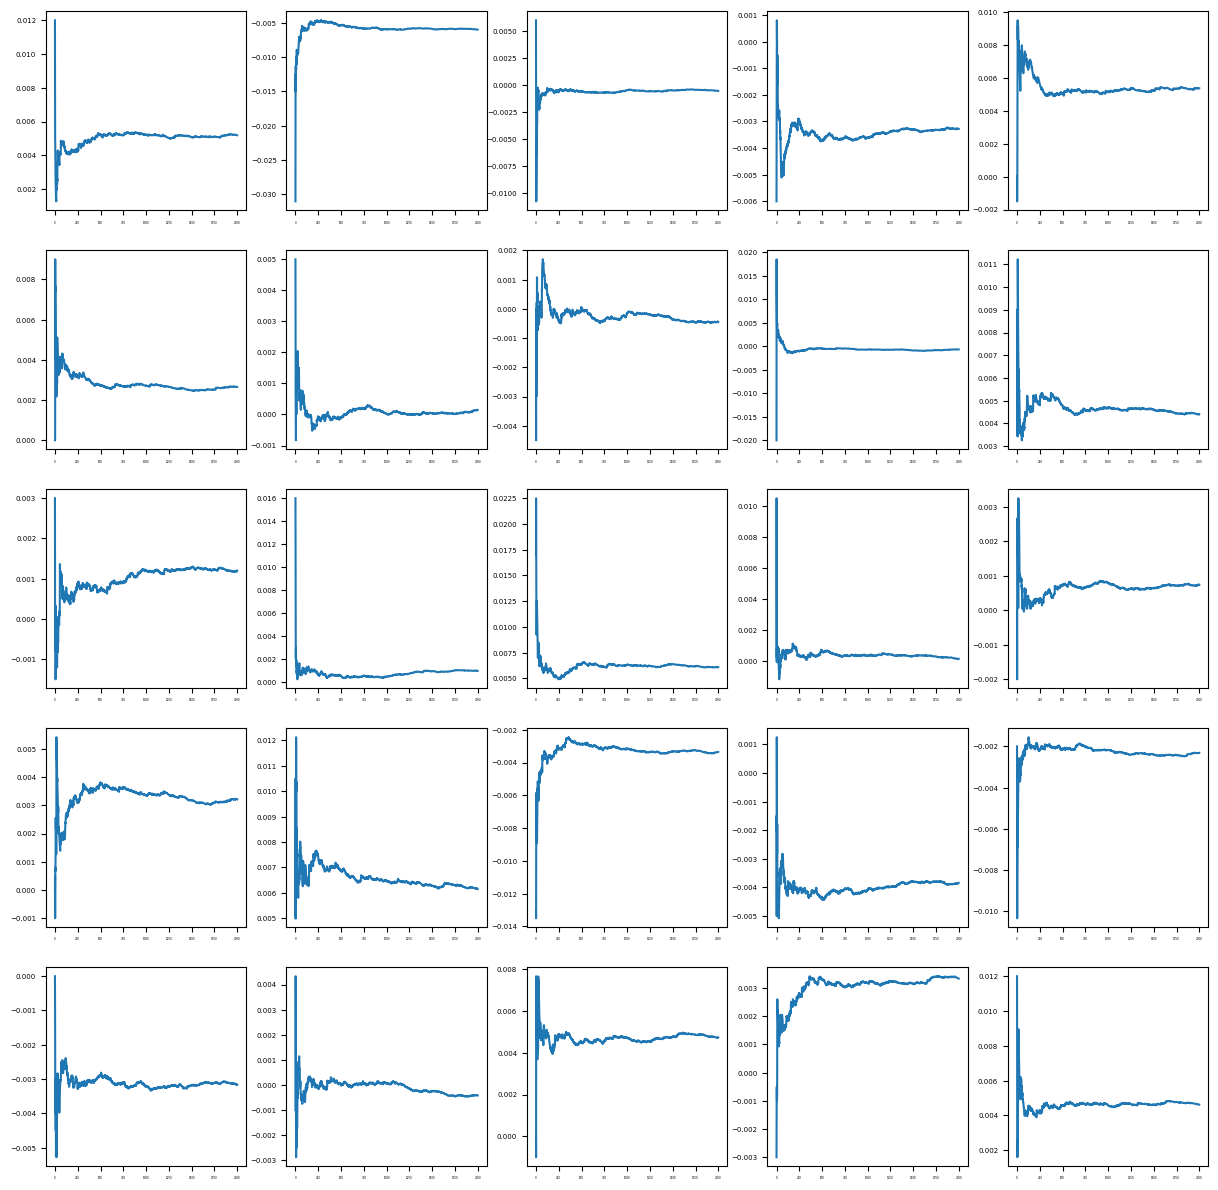

In [21]:
convergence_plots(dshap.marginals_tmc)
plt.savefig('../img/dshap_logistic_marginals_tmc.png')

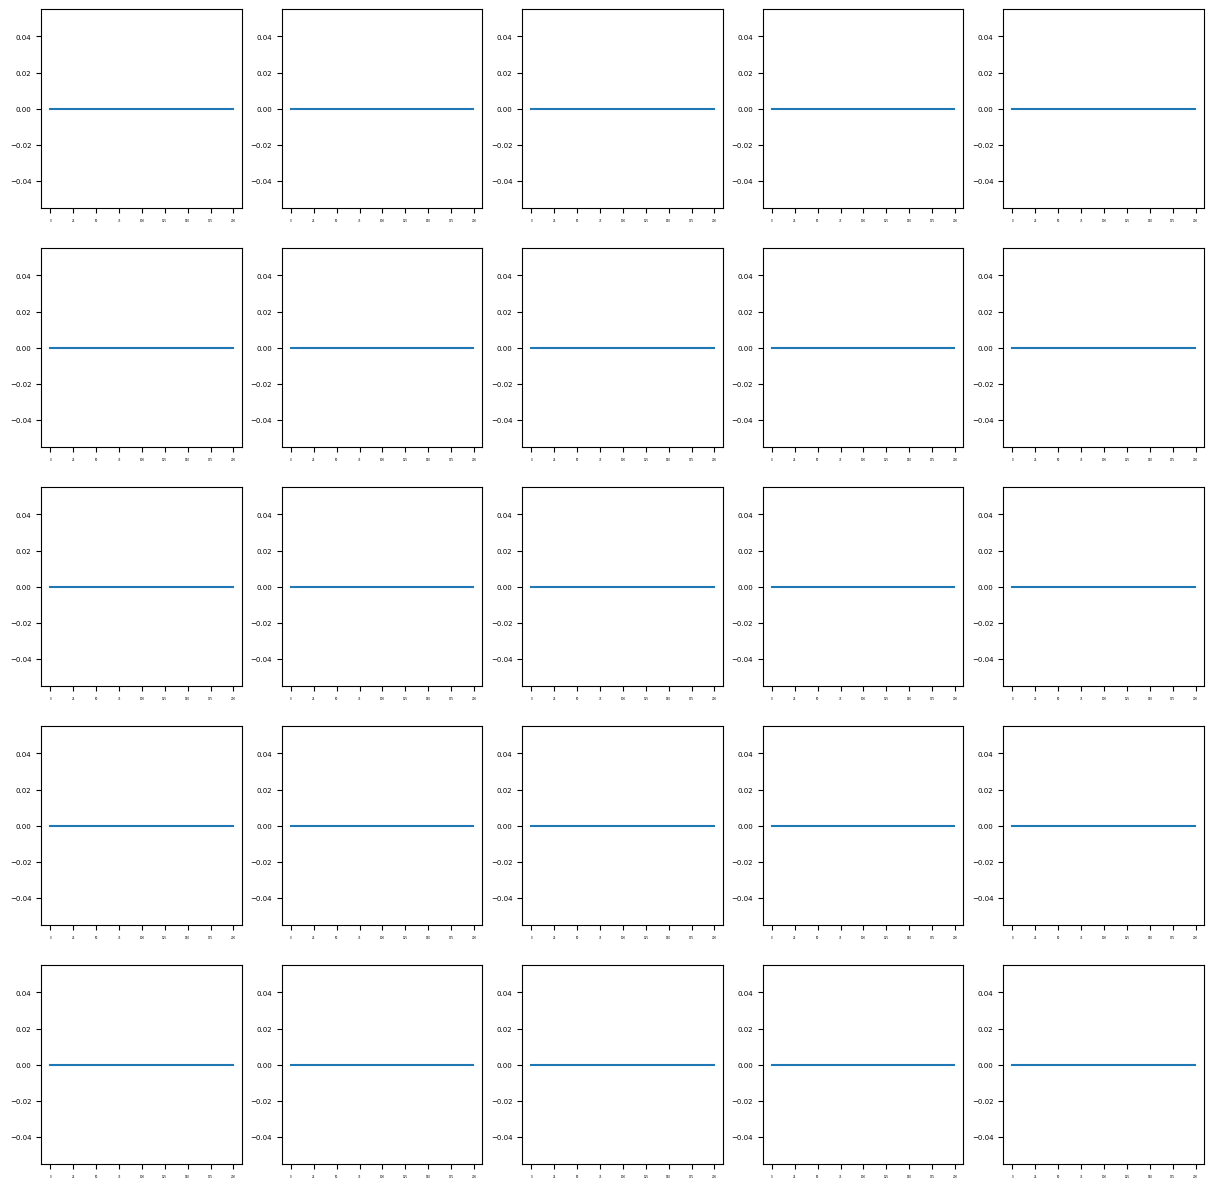

In [22]:
convergence_plots(dshap.marginals_g)
plt.savefig('../img/dshap_logistic_marginals_g.png')

Now let's see the effect of removing high valuen points

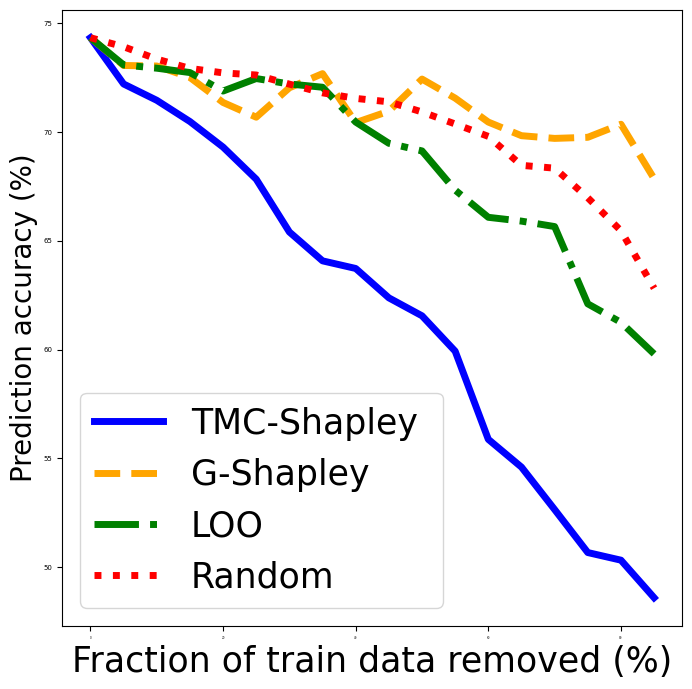

In [23]:
dshap.performance_plots([dshap.vals_tmc, dshap.vals_g, dshap.vals_loo], num_plot_markers=20,
                       sources=dshap.sources)
plt.savefig('../img/dshap_logistic_performance.png')